In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
import math
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import os

C:\Users\Bjorn\anaconda3\envs\new_tf\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Bjorn\anaconda3\envs\new_tf\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
import cv2

In [3]:
cat_path = "datasett-hundogkatt/training_set/training_set/cats/"
dog_path = "datasett-hundogkatt/training_set/training_set/dogs/"

In [4]:
cat_img = []
for i in os.listdir(cat_path):
    if i.endswith(".jpg"):
        temp_img = cv2.imread(os.path.join(cat_path, i), cv2.IMREAD_GRAYSCALE)
        temp_img = cv2.resize(temp_img, (64,64), interpolation= cv2.INTER_LINEAR )
        cat_img.append(temp_img)

In [5]:
cat_img = np.asarray(cat_img)
#cat_img = np.expand_dims(cat_img,-1)

In [6]:
y_cat = np.zeros(cat_img.shape[0])

In [7]:
dog_img = []
for i in os.listdir(dog_path):
    if i.endswith(".jpg"):
        temp_img = cv2.imread(os.path.join(dog_path, i), cv2.IMREAD_GRAYSCALE)
        temp_img = cv2.resize(temp_img, (64,64), interpolation= cv2.INTER_LINEAR )
        dog_img.append(temp_img)


In [8]:
dog_img = np.asarray(dog_img)
#dog_img = np.expand_dims(dog_img,-1)

In [9]:
y_dog = np.ones(dog_img.shape[0])

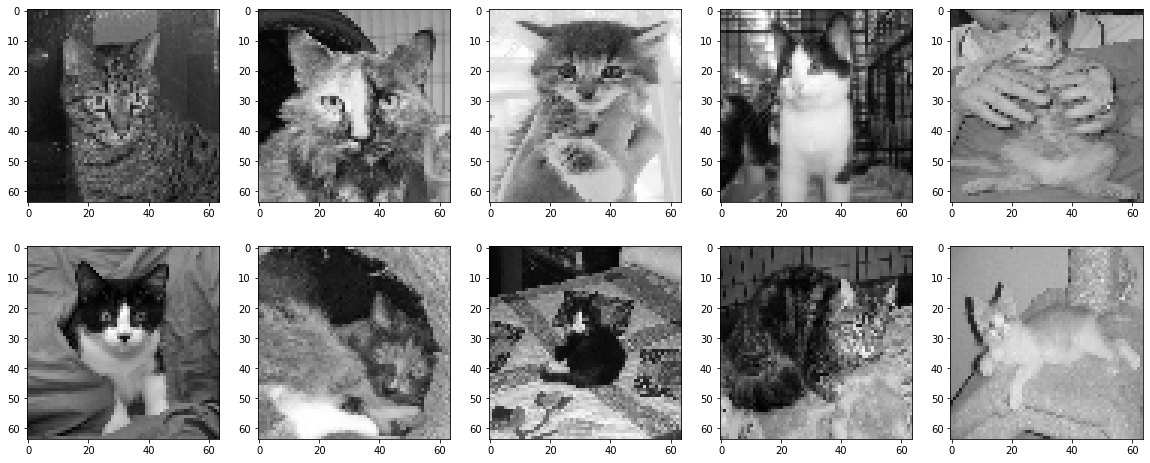

In [10]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(cat_img[i],cmap='gray', vmin=0, vmax=255)

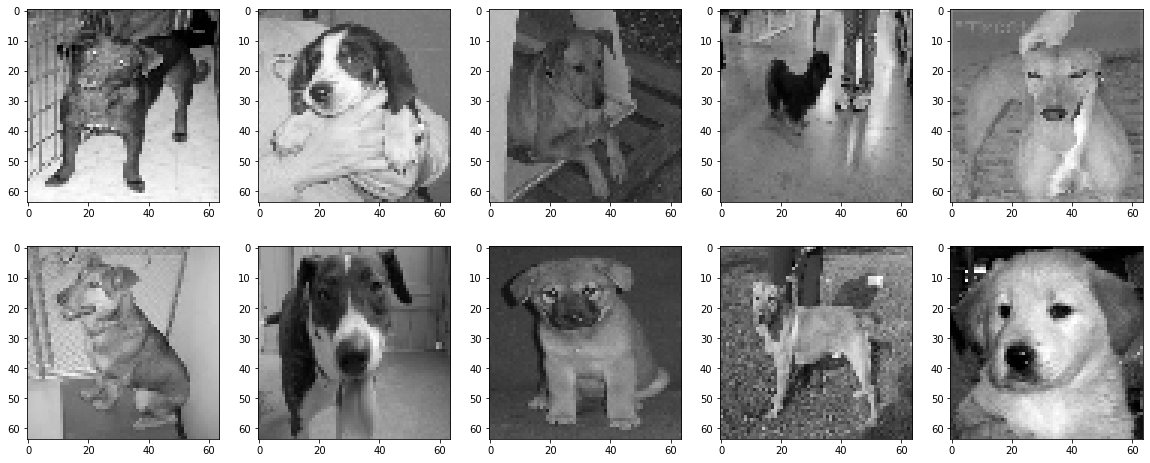

In [11]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(dog_img[i],cmap='gray', vmin=0, vmax=255)

In [12]:
X = np.vstack([cat_img,dog_img])

In [13]:
y = np.hstack([y_cat,y_dog])

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

In [15]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([3188, 3216], dtype=int64))

In [16]:
np.unique(y_val, return_counts=True)

(array([0., 1.]), array([812, 789], dtype=int64))

In [17]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])

In [18]:
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1]*X_val.shape[2])

In [64]:
def dnn(n_features, n_output):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train,)))
    model.add(tf.keras.layers.Dense(units=n_output, activation='sigmoid'))  # Output layer for binary classification
    return model

In [65]:
y_train = np.expand_dims(y_train ,-1)

In [66]:
model = dnn(X_train.shape[1],y_train.shape[1])

In [67]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 262,273 (1.00 MB)

 Trainable params: 262,273 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC(curve='ROC')])

In [69]:
X_train.shape

(6404, 4096)

In [70]:
history = model.fit(x=X_train,y=y_train, epochs=25, batch_size=64, validation_data=(X_val,y_val), shuffle=True)

Epoch 1/25


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1), output.shape=(None, 1)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history[list(history.history.keys())[2]], label="AUROC")
plt.plot(history.history[list(history.history.keys())[5]], label="val_AUROC")
plt.legend()

In [ ]:
model.evaluate(X_test,y_test)